# Laboratorio: Clasificación de sentimientos

El propósito de este laboratorio es la construcción de un clasificardor de críticas de diferentes tipos de productos/servicios. Para ello es indispensable que primero hayan realizado el Tutorial. Este laboratorio es calificable, la nota máxima es de 100 puntos.

In [1]:
# Importación de librerías, no olviden ejecutar esta celda.
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import seaborn as sns
import re
import nltk 
import numpy as np
stemmer = nltk.stem.SnowballStemmer('spanish')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## 1. Procesamiento de texto

#### 1.1. Dataset

In [2]:
# CELDA NO MODIFICABLE
# Carga del dataset 

import pandas as pd
                                      
df = pd.read_csv('Laboratorio_Analisis_de_Sentimientos.csv', sep=',', header=0, index_col= None, engine='python', 
                 usecols=['texto','polaridad'])
df.sample(5)

# Como se observa el dataset contiene ejemplos de críticas con su respectiva polaridad.

,texto,polaridad
857,Me encantaron las fechas envueltas en tocino.,positivo
981,Él vino corriendo detrás de nosotros cuando se...,positivo
626,Lo que DEBERÍA haber sido una cena de Nochebue...,negativo
866,Por el precio esto fue una gran oferta.,positivo
77,"El micrófono allí es una broma, y ​​el volumen...",negativo


**Pregunta 1 (10p):** Asigne a las variables texto_1000 y polaridad_1000, el texto y la polaridad de la crítica en el indice 1000 del dataset.


In [5]:
# Por favor en esta celda conteste la Pregunta 1. Use los nombres de variables 
# especificados: texto_1000, y polaridad_1000.

# your code here
texto_1000 = df.loc[1000].texto
polaridad_1000 = df.loc[1000].polaridad

In [6]:
## PRUEBAS OCULTAS PARA CALIFICACIÓN PREGUNTA 1

In [7]:
# CELDA NO MODIFICABLE 
# Impresión de las variables para revisar su contenido.
print("Crítica:" , texto_1000)
print("Poralidad:", polaridad_1000)
# Como se puede observar el comentario es claramente positivo.

Crítica: Las verduras son tan frescas y la salsa se siente como auténtica tailandesa.
Poralidad: positivo


Text(3.674999999999997, 0.5, 'Número de Ejemplos')

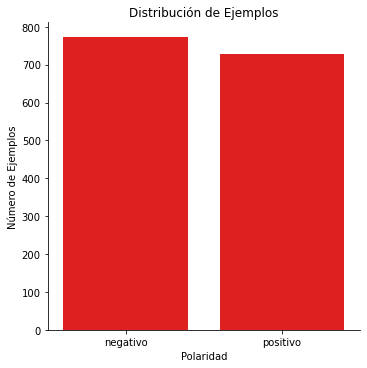

In [8]:
# CELDA NO MODIFICABLE 
# Veamos ahora la distribución de los ejemplos
sns.catplot(x='polaridad', kind='count', color='r', data=df)
plt.title('Distribución de Ejemplos')
plt.xlabel('Polaridad')
plt.ylabel('Número de Ejemplos')

In [9]:
# CELDA NO MODIFICABLE 
# Esta función nos permite procesar el texto.
'''
* processing_text
* @param texto str
* @return processed_feature str
'''
def processing_text(texto):
    # Paso 1: Remover con un expresión regular carateres especiales (no palabras).
    processed_feature = re.sub(r'\W', ' ', str(texto))
    # Paso 2: Remover ocurrencias de caracteres individuales
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 
    # Paso 3: Remover números (Ocurrencias muy esporádicas en nuestro dataset)
    processed_feature = re.sub(r'[0-9]+', ' ', processed_feature)
    # Paso 4: Simplificar espacios concecutivos a un único espacio entre palabras
    processed_feature = re.sub(' +', ' ', processed_feature)
    # Paso 5: Pasar todo el texto a minúsculas    
    processed_feature = processed_feature.lower()
    # Paso 6: Aplicar stemming. Es una forma de enviar las palabras a una raiz común simplificando de esta manera el vocabulario. 
    #         por ejemplo las palabras (absurdo, absurdos) que estan en el review 2895 seran llevados a la raiz común "absurd"
    #         y de esta forma se evita tener dos palabras diferentes con el mismo significado en nuestro vocabulario.
    processed_feature = " ".join([stemmer.stem(i) for i in processed_feature.split()])
    
    return processed_feature

**Pregunta 2 (10p):** Asigne a las variables "texto_para_procesar" y "labels" todas las criticas y sus respectivas polaridades  Pista: puede usar df['NOMBRE_COLUMNA'].values


In [10]:
# Por favor en esta celda conteste la Pregunta 2. Use los nombres de variables 
# especificados: texto_para_procesar, y labels.

# your code here
texto_para_procesar = df['texto'].values
labels = df['polaridad'].values

In [11]:
## PRUEBAS OCULTAS PARA CALIFICACIÓN PREGUNTA 2

In [12]:
# CELDA NO MODIFICABLE 
# Se procede a procesar todas las críticas y almacenarlas en la variable texto_procesado
texto_procesado = []
for sentence in range(0, len(texto_para_procesar)):
    procesado = processing_text(texto_para_procesar[sentence])
    texto_procesado.append(procesado)

## 2. Representación

**Pregunta 3 (10p):** Asigne a la "variable texto_1000_procesado" el texto resultante despues de procesar la crítica 1000. 

In [13]:
# Por favor en esta celda conteste la Pregunta 3. Use los nombres de variables 
# especificados: texto_1000_procesado.

# your code here
texto_1000_procesado = texto_procesado[1000]

In [14]:
## PRUEBAS OCULTAS PARA CALIFICACIÓN PREGUNTA 3


In [15]:
# De esta forma se ve la crítica 1000 una vez procesada.
print(texto_1000_procesado)

las verdur son tan fresc la sals se sient com autent tailandes


**Pregunta 4 (10p)** Haga uso de CountVectorizer para crear una representación de bolsa de palabras del texto. Use un vocabulario de 2000 términos. No contemple las palabras de parada dentro del vocabulario. Recuerde que puede acceder a la lista de palabras de parada en español con stopwords.words('spanish'). Siga la siguiente nomenclatura de variables:

- "vectorizer" para la instancia de CountVectorizer
- "texto_features" para almacenar la representación vectorial de las críticas. 

In [17]:
# Por favor en esta celda conteste la Pregunta 4. Use los nombres de variables 
# especificados: vectorizer, texto_features.

# your code here
vectorizer = CountVectorizer(max_features=2000, stop_words=stopwords.words('spanish'))
texto_features = vectorizer.fit_transform(texto_procesado).toarray()

In [18]:
## PRUEBAS OCULTAS PARA CALIFICACIÓN PREGUNTA 4


In [19]:
# CELDA NO MODIFICABLE 
# Imprimamos los 20 primeros términos del vocabulario
vectorizer.get_feature_names()[0:20]

['abaj',
 'abismal',
 'abre',
 'abri',
 'abrir',
 'abrum',
 'absolut',
 'abstrus',
 'abund',
 'aburr',
 'acab',
 'acces',
 'accion',
 'aceit',
 'acent',
 'acept',
 'acerc',
 'acerqu',
 'acert',
 'achill']

In [20]:
# Primeras 200 posiciones de la representación vectorial de la crítica número 39
print(texto_features[39][0:200])

[0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


**Pregunta 5 (20p)** Según la representación vectorial de la crítica número 39, cuantas veces ocurre el término abismal (raiz de abismales), y absolut (raiz de absolutamente)?

Asigne los valores de ocurrencia a las variables "num_abismal_critica_39" y "num_absolut_critica_39" respectivamente.

*Pista:* Búsque en el diccionario en que posiciones se encuentran las palabras de interés, luego búsque en la representación vectorial de la crítica 39 dichas posiciones.

In [21]:
# Por favor en esta celda conteste la Pregunta 5. Use los nombres de variables 
# especificados: num_abismal_critica_39, num_absolut_critica_39.

# your code here
num_abismal_critica_39 = 1
num_absolut_critica_39 = 1

In [22]:
## PRUEBAS OCULTAS PARA CALIFICACIÓN PREGUNTA 5

# 3. Modelamiento

In [25]:
# CELDA NO MODIFICABLE 
# Dividimos nuestro dataset en entrenamiento (80%) y pruebas (20%)
X_train, X_test, y_train, y_test = train_test_split(texto_features, labels, test_size=0.2, random_state=55)

In [24]:
# CELDA NO MODIFICABLE 
# Vamos a instanciar in modelo Naive Bayes.
# Notese que solo esta instanciado pero no se ha entrenado con el dataset de entrenamiento. 
nb = MultinomialNB()

**Pregunta 6 (10p)** Entrene el modelo de Naive Bayes usando el dataset de entrenamiento. 

*Pista:* Use el método fit.

In [26]:
# Por favor en esta celda conteste la Pregunta 6. 

# your code here
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [27]:
## PRUEBAS OCULTAS PARA CALIFICACIÓN PREGUNTA 6

**Pregunta 7 (10p)** Evalue el modelo entrenado en el conjunto de prueba y obtenga el accuracy resultante. Asigne las predicciones en la variable "predictions" y la métrica de accuracy en la variable "accuracy_result".

*Pista:* Use el método predict sobre el dataset de pruebas y le método accuracy_score para calcular el accuracy.


In [31]:
# Por favor en esta celda conteste la Pregunta 7. Use los nombres de variables 
# especificados: predictions, accuracy_result.

# your code here
predictions = nb.predict(X_test)
accuracy_result = accuracy_score(y_test, predictions)

In [32]:
## PRUEBAS OCULTAS PARA CALIFICACIÓN PREGUNTA 7

In [33]:
# Revisemos el accuracy obtenido
print(accuracy_result)

0.8133333333333334


**Pregunta 8 (20p)** Utilice el modelo para predecir la polaridad de la frase "El producto no cumple con mis expectativas". Realice las siguientes etapas:

- Asigne en la variable "test_procesado", el resultado de la etapa de procesamiento.
- Asigne en la variable "test_bow", la representación en bolsa de palabras del texto.
- Asigne en la variable clase_test, el resultado de la predicción (i.e. la polaridad que se le es asignada a la frase)


In [34]:
# Por favor en esta celda conteste la Pregunta 8. 
test = "El producto no cumple con mis expectativas" #No cambie la frase, esto puede afectar la calificación automática.

# your code here
test_procesado = processing_text(test)
test_bow = vectorizer.transform([test_procesado])
clase_test = nb.predict(test_bow)

In [35]:
## PRUEBAS OCULTAS PARA CALIFICACIÓN PREGUNTA 8

In [36]:
# Finalmente imprimamos nuestra frase de test y la polaridad predicha por nuestro
# modelo de naive bayes.

print("Crítica test:", test)
print("Crítica test:", clase_test)

Crítica test: El producto no cumple con mis expectativas
Crítica test: ['negativo']
